# EDA

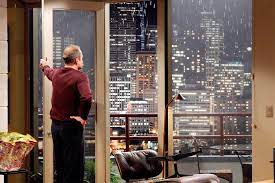

In [37]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import psycopg2

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)




In [38]:
import os # provides functions for interacting with operating system
from dotenv import load_dotenv # reads key-value pairs from a .env file and can set them as environment variables

load_dotenv() # takes environment variables from .env

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [39]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)



In [ ]:
query_string = """
 
   SELECT 
    kchd.*,              
    kchs.price,         
    kchs.date,
    kchs.id
FROM 
    eda.king_county_house_details kchd
INNER JOIN 
    eda.king_county_house_sales kchs 
    ON kchd.id = kchs.house_id
WHERE 
    (kchd.grade > 8
    AND kchd.waterfront = 1)  
ORDER BY
    kchd.id, kchs.house_id;

"""
df_main = pd.read_sql(query_string, conn)
df_main


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id
0,42000130,5.000,4.500,4440.000,9784.000,2.000,0.000,0.000,3,10,...,2012,0.000,98168,47.470,-122.275,2720.000,10080.000,600000.000,2014-09-24,6384
1,98000130,4.000,5.000,4630.000,24054.000,2.000,0.000,3.000,3,11,...,2005,0.000,98075,47.587,-121.966,4630.000,17584.000,1430000.000,2015-03-24,15899
2,98001070,5.000,4.250,4610.000,13252.000,2.000,0.000,4.000,3,11,...,2004,0.000,98075,47.588,-121.969,4400.000,15154.000,1170000.000,2014-08-18,12418
3,117000001,4.000,4.250,1960.000,3565.000,2.000,0.000,0.000,3,7,...,1940,20030.000,98116,47.585,-122.384,1920.000,5750.000,540000.000,2014-05-27,8725
4,125059138,6.000,4.500,3300.000,7561.000,2.000,0.000,0.000,3,8,...,1980,NaN,98052,47.679,-122.104,2470.000,7561.000,510000.000,2014-07-22,7645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,9325200110,5.000,4.250,3380.000,7805.000,2.000,0.000,0.000,3,8,...,2014,0.000,98148,47.435,-122.328,2790.000,7805.000,569950.000,2014-09-09,8001
217,9359100750,4.000,4.500,3080.000,10550.000,2.000,0.000,3.000,3,8,...,1976,20070.000,98040,47.581,-122.244,2780.000,10550.000,1400000.000,2014-10-31,2844
218,9412400185,4.000,4.500,4750.000,13912.000,2.000,0.000,2.000,3,10,...,2005,0.000,98118,47.533,-122.265,3600.000,22124.000,1310000.000,2014-06-19,5113
219,9471200200,4.000,4.250,5040.000,16048.000,1.000,0.000,3.000,3,10,...,1950,NaN,98105,47.670,-122.260,3960.000,14000.000,2530000.000,2015-03-25,2039


In [43]:
df_main.sqft_basement

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
        ...   
216      0.000
217   1140.000
218   1150.000
219   1620.000
220   1120.000
Name: sqft_basement, Length: 221, dtype: float64

## Cleaning the data


In [53]:
#df_main.dtypes
df_main.date = pd.to_datetime(df_main.date)
df_main

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id
0,42000130,5.000,4.500,4440.000,9784.000,2.000,0,0.000,3,10,...,2012,2012,98168,47.470,-122.275,2720.000,10080.000,600000.000,2014-09-24,6384
1,98000130,4.000,5.000,4630.000,24054.000,2.000,0,3.000,3,11,...,2005,2005,98075,47.587,-121.966,4630.000,17584.000,1430000.000,2015-03-24,15899
2,98001070,5.000,4.250,4610.000,13252.000,2.000,0,4.000,3,11,...,2004,2004,98075,47.588,-121.969,4400.000,15154.000,1170000.000,2014-08-18,12418
3,117000001,4.000,4.250,1960.000,3565.000,2.000,0,0.000,3,7,...,1940,2003,98116,47.585,-122.384,1920.000,5750.000,540000.000,2014-05-27,8725
4,125059138,6.000,4.500,3300.000,7561.000,2.000,0,0.000,3,8,...,1980,1980,98052,47.679,-122.104,2470.000,7561.000,510000.000,2014-07-22,7645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,9325200110,5.000,4.250,3380.000,7805.000,2.000,0,0.000,3,8,...,2014,2014,98148,47.435,-122.328,2790.000,7805.000,569950.000,2014-09-09,8001
217,9359100750,4.000,4.500,3080.000,10550.000,2.000,0,3.000,3,8,...,1976,2007,98040,47.581,-122.244,2780.000,10550.000,1400000.000,2014-10-31,2844
218,9412400185,4.000,4.500,4750.000,13912.000,2.000,0,2.000,3,10,...,2005,2005,98118,47.533,-122.265,3600.000,22124.000,1310000.000,2014-06-19,5113
219,9471200200,4.000,4.250,5040.000,16048.000,1.000,0,3.000,3,10,...,1950,1950,98105,47.670,-122.260,3960.000,14000.000,2530000.000,2015-03-25,2039


In [58]:

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             221 non-null    int64         
 1   bedrooms       221 non-null    float64       
 2   bathrooms      221 non-null    float64       
 3   sqft_living    221 non-null    float64       
 4   sqft_lot       221 non-null    float64       
 5   floors         221 non-null    float64       
 6   waterfront     221 non-null    int64         
 7   view           221 non-null    float64       
 8   condition      221 non-null    int64         
 9   grade          221 non-null    int64         
 10  sqft_above     221 non-null    float64       
 11  sqft_basement  221 non-null    float64       
 12  yr_built       221 non-null    int64         
 13  yr_renovated   221 non-null    int64         
 14  zipcode        221 non-null    int64         
 15  lat            221 non-

In [56]:
df_main.yr_renovated =  df_main.yr_renovated/10
df_main[['yr_renovated', 
         'sqft_basement', 
         'view']] = df_main[['yr_renovated', 'sqft_basement', 'view']].fillna(0)
df_main.loc[df_main.yr_renovated == 0,'yr_renovated'] = df_main.loc[df_main.yr_renovated == 0,'yr_built']
df_main.yr_renovated = df_main.yr_renovated.astype(int)
df_main.waterfront = df_main.waterfront.astype(int)

In [47]:
df_main

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date,id
0,42000130,5.000,4.500,4440.000,9784.000,2.000,0,0.000,3,10,...,2012,2012,98168,47.470,-122.275,2720.000,10080.000,600000.000,2014-09-24,6384
1,98000130,4.000,5.000,4630.000,24054.000,2.000,0,3.000,3,11,...,2005,2005,98075,47.587,-121.966,4630.000,17584.000,1430000.000,2015-03-24,15899
2,98001070,5.000,4.250,4610.000,13252.000,2.000,0,4.000,3,11,...,2004,2004,98075,47.588,-121.969,4400.000,15154.000,1170000.000,2014-08-18,12418
3,117000001,4.000,4.250,1960.000,3565.000,2.000,0,0.000,3,7,...,1940,2003,98116,47.585,-122.384,1920.000,5750.000,540000.000,2014-05-27,8725
4,125059138,6.000,4.500,3300.000,7561.000,2.000,0,0.000,3,8,...,1980,1980,98052,47.679,-122.104,2470.000,7561.000,510000.000,2014-07-22,7645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,9325200110,5.000,4.250,3380.000,7805.000,2.000,0,0.000,3,8,...,2014,2014,98148,47.435,-122.328,2790.000,7805.000,569950.000,2014-09-09,8001
217,9359100750,4.000,4.500,3080.000,10550.000,2.000,0,3.000,3,8,...,1976,2007,98040,47.581,-122.244,2780.000,10550.000,1400000.000,2014-10-31,2844
218,9412400185,4.000,4.500,4750.000,13912.000,2.000,0,2.000,3,10,...,2005,2005,98118,47.533,-122.265,3600.000,22124.000,1310000.000,2014-06-19,5113
219,9471200200,4.000,4.250,5040.000,16048.000,1.000,0,3.000,3,10,...,1950,1950,98105,47.670,-122.260,3960.000,14000.000,2530000.000,2015-03-25,2039


In [62]:
df_main_sort = df_main.sort_values(by='yr_built')


In [87]:
df_main_client = df_main[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
         'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'price']]


In [92]:
df_main_client['age'] = 2020 - df_main_client['yr_built']

In [93]:
df_main_client

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,age
0,5.000,4.500,4440.000,9784.000,2.000,3,10,4440.000,0.000,2012,2720.000,10080.000,600000.000,8
1,4.000,5.000,4630.000,24054.000,2.000,3,11,4630.000,0.000,2005,4630.000,17584.000,1430000.000,15
2,5.000,4.250,4610.000,13252.000,2.000,3,11,4610.000,0.000,2004,4400.000,15154.000,1170000.000,16
3,4.000,4.250,1960.000,3565.000,2.000,3,7,1960.000,0.000,1940,1920.000,5750.000,540000.000,80
4,6.000,4.500,3300.000,7561.000,2.000,3,8,3300.000,0.000,1980,2470.000,7561.000,510000.000,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,5.000,4.250,3380.000,7805.000,2.000,3,8,3380.000,0.000,2014,2790.000,7805.000,569950.000,6
217,4.000,4.500,3080.000,10550.000,2.000,3,8,1940.000,1140.000,1976,2780.000,10550.000,1400000.000,44
218,4.000,4.500,4750.000,13912.000,2.000,3,10,3600.000,1150.000,2005,3600.000,22124.000,1310000.000,15
219,4.000,4.250,5040.000,16048.000,1.000,3,10,3420.000,1620.000,1950,3960.000,14000.000,2530000.000,70


In [94]:
df_data_u65 = df_main_client[(df_main_client.yr_built >1900) & (df_main_client.yr_built <=1965)]


In [96]:
df_data_u65

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,age
3,4.000,4.250,1960.000,3565.000,2.000,3,7,1960.000,0.000,1940,1920.000,5750.000,540000.000,80
8,5.000,4.500,3540.000,21217.000,2.000,4,8,2940.000,600.000,1926,1290.000,12040.000,707000.000,94
26,6.000,4.500,4520.000,40164.000,2.000,3,9,3580.000,940.000,1953,2870.000,13068.000,550000.000,67
36,6.000,5.000,7100.000,18200.000,2.500,3,13,5240.000,1860.000,1933,3130.000,6477.000,3200000.000,87
37,5.000,4.750,5410.000,13431.000,2.000,4,10,5050.000,360.000,1941,3750.000,11596.000,2540000.000,79
38,5.000,4.750,6390.000,13180.000,2.000,3,10,4560.000,1830.000,1940,4010.000,8137.000,2470000.000,80
58,4.000,4.750,3970.000,9778.000,2.000,4,11,3390.000,580.000,1928,3970.000,8460.000,2300000.000,92
65,5.000,4.250,4860.000,9453.000,1.500,5,10,3100.000,1760.000,1905,3150.000,8557.000,2250000.000,115
67,9.000,4.500,3830.000,6988.000,2.500,3,7,2450.000,1380.000,1938,1460.000,6291.000,599999.000,82
68,4.000,4.250,3250.000,11780.000,2.000,3,8,2360.000,890.000,1944,1800.000,9000.000,980000.000,76


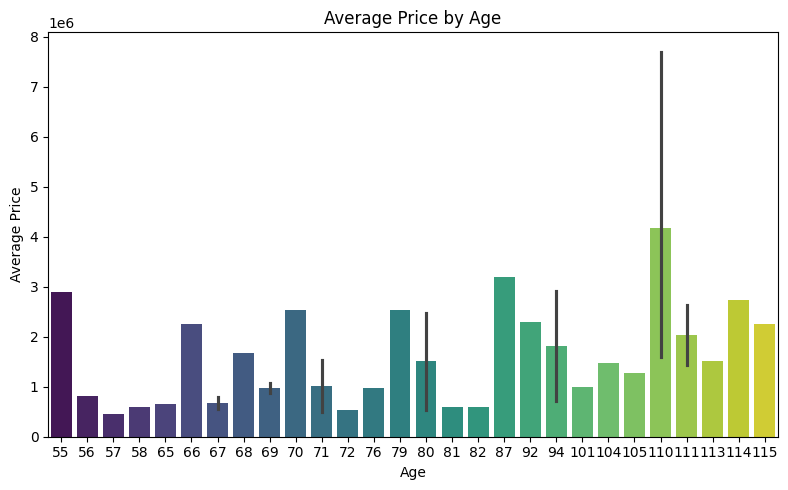

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot with 'age' on the x-axis and 'price' on the y-axis
# We assume df_data_u65 is your DataFrame
sns.barplot(x='age', y='price', data=df_data_u65, palette='viridis')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Price by Age')

# Show the plot
plt.tight_layout()
plt.show()





In [117]:

grouped_by_age = df_data_u65.groupby('age')


for age, group in grouped_by_age:
    print(f"Age: {age}")
    print(group[['price', 'age']])  # or any other columns you want to display
    print("-" * 50)  # Separator between groups


Age: 55
         price  age
79 2890000.000   55
--------------------------------------------------
Age: 56
         price  age
101 824000.000   56
--------------------------------------------------
Age: 57
         price  age
116 460000.000   57
--------------------------------------------------
Age: 58
         price  age
169 599000.000   58
--------------------------------------------------
Age: 65
        price  age
77 650500.000   65
--------------------------------------------------
Age: 66
          price  age
151 2250000.000   66
--------------------------------------------------
Age: 67
         price  age
26  550000.000   67
211 800000.000   67
--------------------------------------------------
Age: 68
          price  age
148 1680000.000   68
--------------------------------------------------
Age: 69
          price  age
115  870000.000   69
186 1080000.000   69
--------------------------------------------------
Age: 70
          price  age
112 2530000.000   70
219 2530000.00